## Basic plots

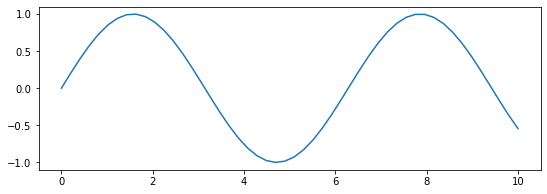

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize = (9, 3))
x = np.linspace(0,10,50)
sinus = np.sin(x)

plt.plot(x, sinus)
plt.show()

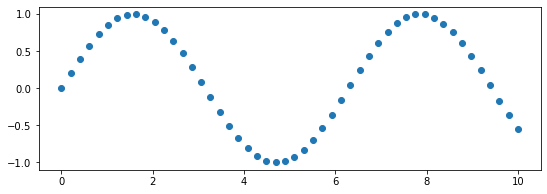

In [7]:
plt.figure(figsize = (9,3))

plt.plot(x, sinus, 'o')
plt.show()

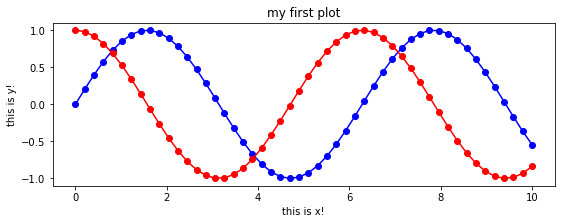

In [8]:
plt.figure(figsize=(9,3))
cosinus = np.cos(x)
plt.plot(x, sinus, '-b', x, sinus, 'ob', x, cosinus, '-r', x, cosinus, 'or')
plt.xlabel('this is x!')
plt.ylabel('this is y!')
plt.title('my first plot')
plt.show()

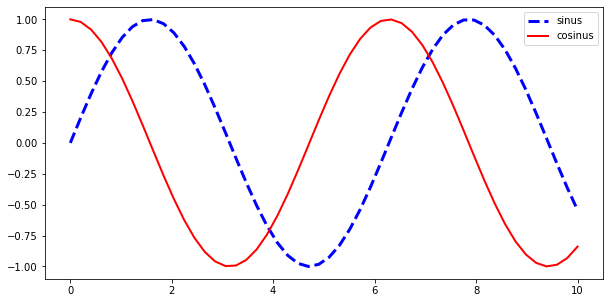

In [11]:
plt.figure(figsize=(10,5))
plt.plot(x, sinus, label = 'sinus', color='blue', linestyle='--', linewidth=3)
plt.plot(x, cosinus, label='cosinus', color='red', linestyle = '-', linewidth=2)
plt.legend()
plt.show()

## scatter 2D plots

In [12]:
import pandas as pd
try:
    salary = pd.read_csv("../datasets/salary_table.csv")
except:
    url = 'https://github.com/duchesnay/pystatsml/raw/master/datasets/salary_table.csv'
    salary = pd.read_csv(url)

df = salary
print(df.head())

   salary  experience education management
0   13876           1  Bachelor          Y
1   11608           1      Ph.D          N
2   18701           1      Ph.D          Y
3   11283           1    Master          N
4   11767           1      Ph.D          N


<AxesSubplot:xlabel='experience', ylabel='salary'>

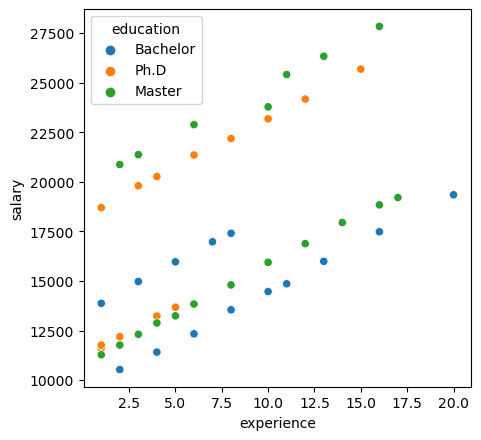

In [15]:
plt.figure(figsize = (5,5), dpi = 100)
sns.scatterplot(x = 'experience', y = 'salary', hue='education', data = df)

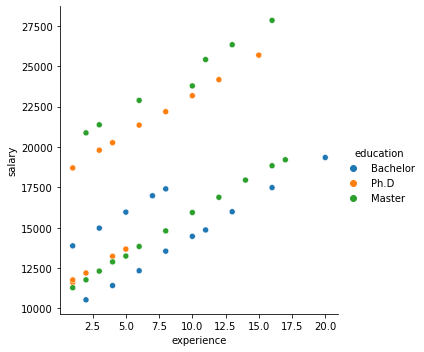

In [16]:
#for legend outside
sns.relplot(x = 'experience', y = 'salary', hue='education', data = df)

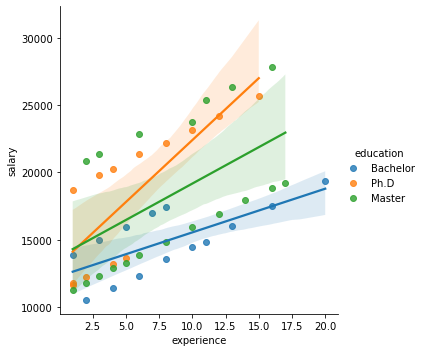

In [17]:
sns.lmplot(x = 'experience', y = 'salary', hue='education', data = df)

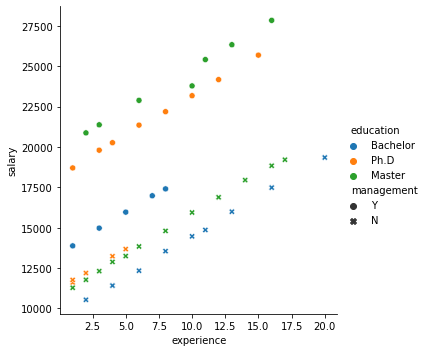

In [18]:
# scatter plot with colors and symbols
sns.relplot(x = 'experience', y = 'salary', hue= 'education', style = 'management', data = df)

In [19]:
# saving figures
plt.plot(x, sinus)
plt.savefig('sinus.png')
plt.close()

In [20]:
# Prefer vectorial format (SVG: Scalable Vector Graphics) can be edited with
# Inkscape, Adobe Illustrator, Blender, etc.
plt.plot(x, sinus)
plt.savefig("sinus.svg")
plt.close()

# Or pdf
plt.plot(x, sinus)
plt.savefig("sinus.pdf")
plt.close()

## boxplot and violin plot: one factor

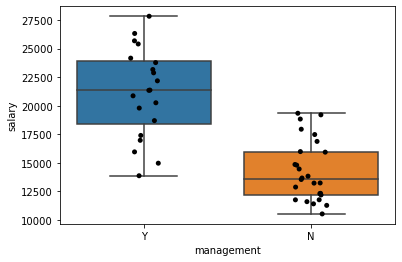

In [21]:
# Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution.
ax = sns.boxplot(x= 'management', y = 'salary', data = df)
ax = sns.stripplot(x= 'management', y = 'salary', data = salary, jitter = True, color= 'black')

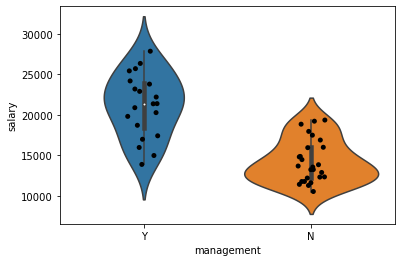

In [22]:
zx = sns.violinplot(x= 'management', y = 'salary', data = df)
zx = sns.stripplot(x= 'management', y = 'salary', data = salary, jitter = True, color= 'black')

## Boxplot and violin plot: two factors

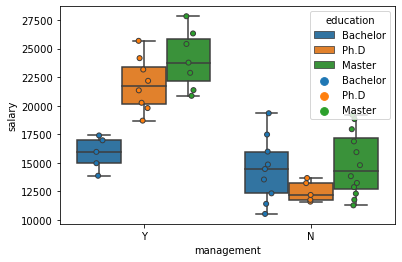

In [23]:
ax = sns.boxplot(x="management", y="salary", hue="education", data=salary)
ax = sns.stripplot(x="management", y="salary", hue="education", data=salary, jitter=True, dodge=True, linewidth=1)

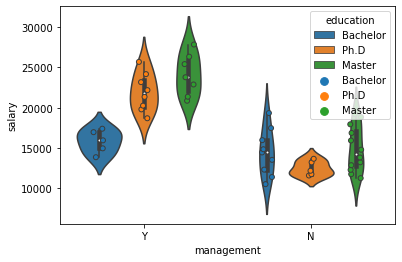

In [24]:
ax = sns.violinplot(x="management", y="salary", hue="education", data=salary)
ax = sns.stripplot(x="management", y="salary", hue="education", data=salary, jitter=True, dodge=True, linewidth=1)

## Distributions and density plot

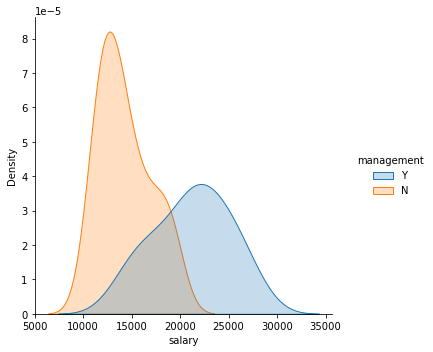

In [25]:
ax = sns.displot(x = 'salary', hue= 'management', kind='kde', data = df, fill = True )

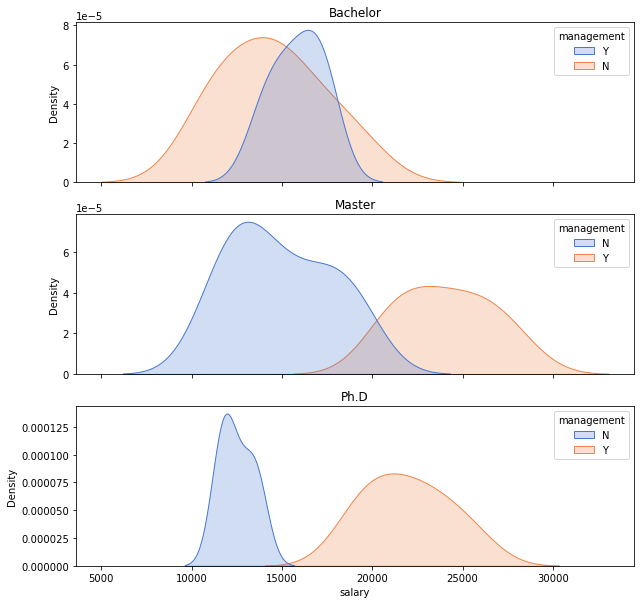

In [30]:
fig, axes = plt.subplots(3, 1, figsize = (10,10), sharex = True)

i = 0
for edu, d in salary.groupby(['education']):
    sns.kdeplot(x="salary", hue="management", data=d, fill=True, ax=axes[i], palette="muted")
    axes[i].set_title(edu)
    i += 1    

## pairwise scatter plots

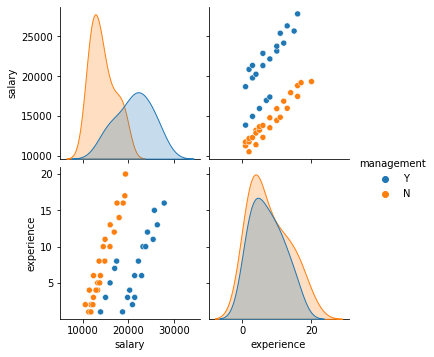

In [31]:
ax = sns.pairplot(salary, hue='management')

## Time Series

In [32]:
sns.set(style= 'darkgrid')

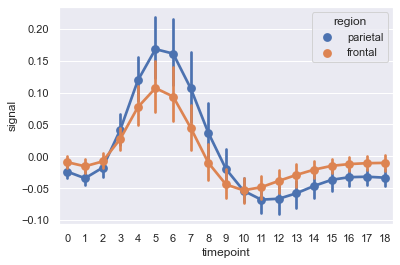

In [33]:
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
ax = sns.pointplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)